# **Music Recommendation System**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [4]:
# Importing the datasets
from google.colab import files
count_df = pd.read_csv('drive/My Drive/Colab Notebooks/MIT Case Studies/Capstone Project/count_data.csv')
song_df = pd.read_csv('drive/My Drive/Colab Notebooks/MIT Case Studies/Capstone Project/song_data.csv')

In [5]:
count_df = count_df.drop(columns = 'Unnamed: 0', axis=1)

### **Understanding the data by viewing a few observations**

In [6]:
# See top 10 records of count_df data
count_df.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [7]:
count_df.sort_values(by='play_count', ascending=False)

,user_id,song_id,play_count
1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213
1048310,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
1586780,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
31179,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
1875121,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOBONKR12A58A7A7E0,683
...,...,...,...
850079,ec4778896a7afa53096e1ffcffc0a5bbb38d2fbe,SORQMMA12A6D4F6F41,1
850078,ec4778896a7afa53096e1ffcffc0a5bbb38d2fbe,SOPZSEZ12A6D4F74AE,1
850072,067e749bd3369149ae64f101ba5352d91e9e76ac,SOZDMMX12B0B8094F8,1
850071,067e749bd3369149ae64f101ba5352d91e9e76ac,SOZBKFF12A679D7E21,1


In [8]:
# See top 10 records of song_df data
song_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


### **Let us check the data types and and missing values of each column**

In [9]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [10]:
count_df.isnull().sum()

user_id       0
song_id       0
play_count    0
dtype: int64

In [11]:
count_df.duplicated(['user_id', 'song_id']).sum()

0

In [12]:
# Drop duplicate records based on song_id column in song_df dataframe
song_df.drop_duplicates(['song_id'], inplace=True)
print (song_df.duplicated(['song_id']).sum())

0


In [13]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999056 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   song_id      999056 non-null  object
 1   title        999041 non-null  object
 2   release      999051 non-null  object
 3   artist_name  999056 non-null  object
 4   year         999056 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 45.7+ MB


#### **Observations and Insights:_____________**

1) Duplicate records found in song_df has been dropped

2) few songs are missing title and release date i.e. has null records

3) data type in song_df are all object type except year which is of integer type. ideally it should be converted to Date type column but as we will not be using year data for our analysis it will finally be dropped

4) count_df has no duplicate and no null records

5) data type in count_df is all object except play_count which is integer. No changes in the data type needed here

In [14]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
song_df = song_df.drop_duplicates() #----------this is as well done above already
df = pd.merge(left=count_df, right=song_df, on='song_id', how='left')

# Drop the column 'Unnamed: 0'
# Comment: this part was already done above

In [15]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [16]:
df.duplicated(['song_id', 'user_id']).sum()

0

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [17]:
# Apply label encoding for "user_id" and "song_id"
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['song_id'] = le.fit_transform(df['song_id'])
df['user_id'] = le.fit_transform(df['user_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [18]:
df.shape

(2000000, 7)

In [19]:
# copy of the original data for plotting top 10 songs for play count
# used in the plots section of this notebook
df_plot = df.copy()


In [20]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [21]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]


In [22]:
df.shape

(438390, 7)

In [23]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    



In [24]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [25]:
df_final.shape

(130398, 7)

In [26]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [27]:
# Drop records with play_count more than(>) 5
# df_final.drop(index = df_final.loc[df_final.play_count>5].index, inplace=True)

#Flatten the play counts to max 5
df_final.loc[df_final.play_count>5,'play_count'] = 5

In [28]:
df_final.sort_values(by='play_count', ascending=False)

,user_id,song_id,play_count,title,release,artist_name,year
1005411,27021,2914,5,Billy Liar,Billy Liar (CD-Single),The Decemberists,2003
361143,32364,9162,5,Electric Feel,The Anthems,MGMT,2007
361137,32364,8704,5,Last Day Of Magic,Midnight Boom,The Kills,2008
361131,32364,8034,5,Paper Planes,Decent Work For Decent Pay,M.I.A.,0
1456055,58216,5645,5,Représente,Fat Come Back,Alliance Ethnik,1999
...,...,...,...,...,...,...,...
873799,38654,1344,1,Sour Cherry,Midnight Boom,The Kills,2008
873793,38654,918,1,My Night With the Prostitute From Marseille,March of the Zapotec and Realpeople Holland,Beirut,2007
873790,38654,771,1,Under The Gun,Sawdust,The Killers,2004
873784,38654,614,1,You're The One,If There Was A Way,Dwight Yoakam,1990


In [29]:
df_final.duplicated(['user_id','song_id']).sum()

0

In [30]:
df_final.shape

(130398, 7)

In [31]:
#Exporting the data to be used in the Milestone 2
df_final.to_csv('df_final.csv')
!cp df_final.csv "drive/My Drive/Colab Notebooks/MIT Case Studies/Capstone Project"

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [32]:
# Display total number of unique user_id
df_final.user_id.nunique()

3156

Total number of unique song id

In [33]:
# Display total number of unique song_id
df_final.song_id.nunique()

563

Total number of unique artists

In [34]:
# Display total number of unique artists
df_final.artist_name.nunique()

232

#### **Observations and Insights:__________**

1) Total number of possible ratings are 3155 * 563 = 1776265, however available ratings are 117876 (about 7% ) so the interaction matrix is a sparse matrix and may impact quality of results


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [35]:
# Song listened by highest number of users (i.e. total number of users interacted with a song )
print(df_final.groupby(by='song_id').user_id.count().sort_values(ascending=False))


song_id
352     1002
2220     928
8582     838
5531     817
7416     754
        ... 
1767     120
2217     120
8973     120
6959     120
3752     120
Name: user_id, Length: 563, dtype: int64


Most interacted users

In [36]:
#Count of songs listened by each user
df_final.groupby(by='user_id').song_id.count().sort_values(ascending=False)

user_id
61472    247
15733    239
3237     238
37049    215
43041    206
        ... 
34194      1
56789      1
19776      1
45476      1
76347      1
Name: song_id, Length: 3156, dtype: int64

#### **Observations and Insights:_______**

1. As most interacted songs has been set to minimum 120 interaction, this would improve the quality of results on finding k-neighbours in item-item similarity method. 

2. Similarly dropping the users who has interactions with less than 90 songs would improve results of k-neighbours for in user-user interaction 

3. This would also help us to reduce the amount of data which otherwise would be computationally expensive 

Songs played in a year

In [37]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.sort_index()

,title
year,
1969,264
1970,130
1971,153
1973,286
1974,689
1975,224
1976,535
1978,120
1979,299


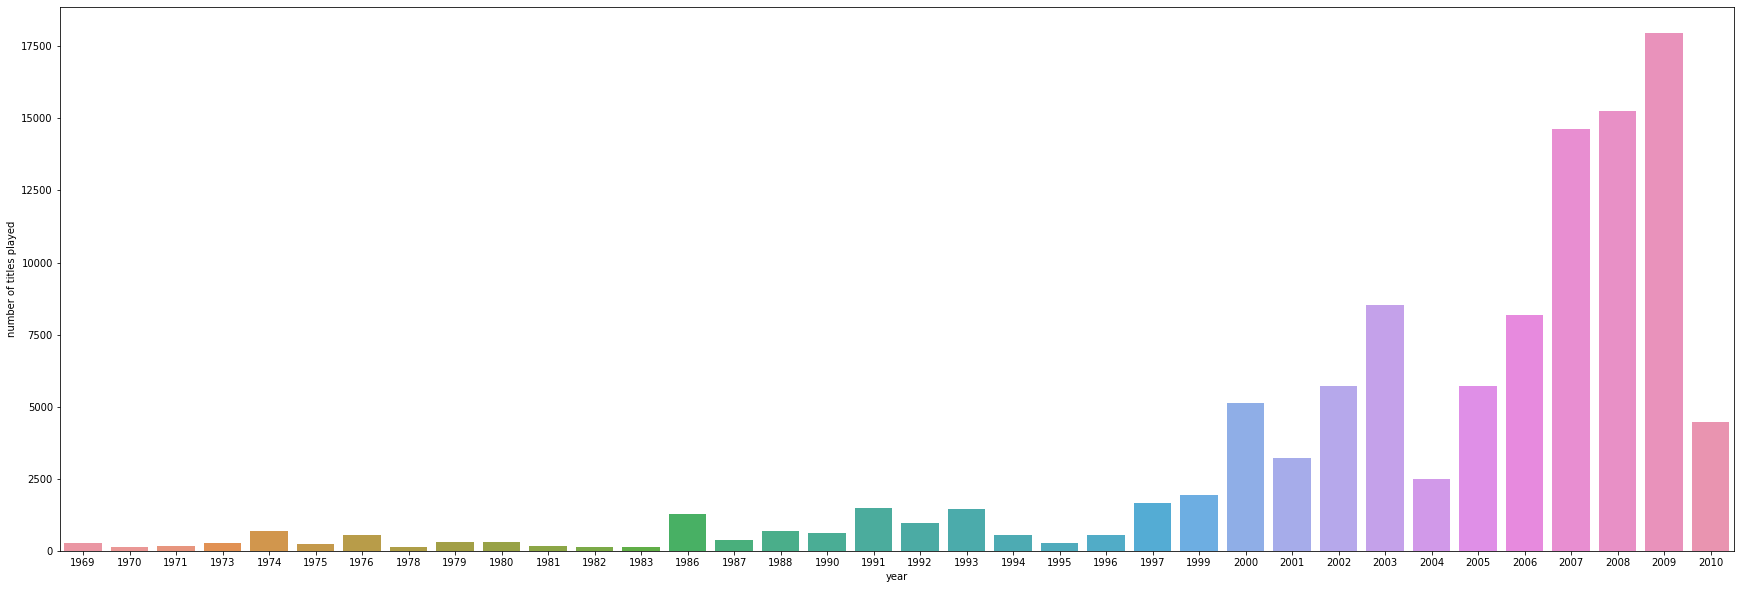

In [38]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

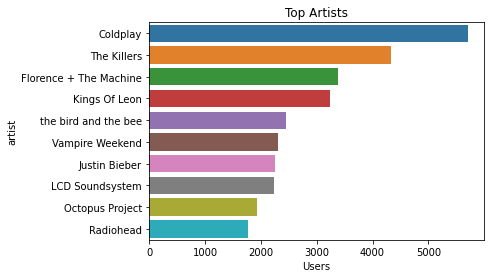

In [39]:
#Plot top 10 artists

# pick top 10 artists by count
top_10_artists = df_final.artist_name.value_counts().sort_values(ascending=False)[:10]
#create dataframe for plotting
top_10_artists = pd.DataFrame(top_10_artists).reset_index()
#rename columns names of the dataframe
top_10_artists.rename(columns = {'index':'artist', 'artist_name':'count'}, inplace=True)

# create a plot
sns.barplot(data = top_10_artists, y='artist', x='count')
plt.title('Top Artists')
plt.xlabel('Users')
plt.show()

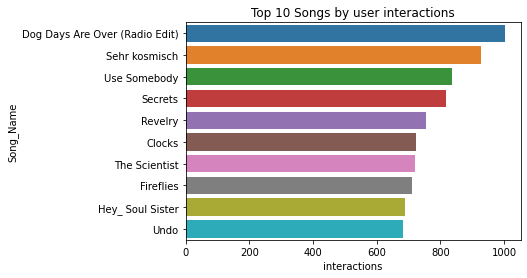

In [40]:
# Top 10 most interacted songs

top_10_songs = df_final.title.value_counts().sort_values(ascending=False).iloc[:10]
top_10_songs = pd.DataFrame(top_10_songs).reset_index()
top_10_songs.rename(columns={'index': 'Song_Name', 'title': 'interactions'}, inplace=True)

# Plotting top 10 songs
plt.figure()
plots = sns.barplot(data = top_10_songs, x = 'interactions', y = 'Song_Name')
plt.title('Top 10 Songs by user interactions')
plt.show()

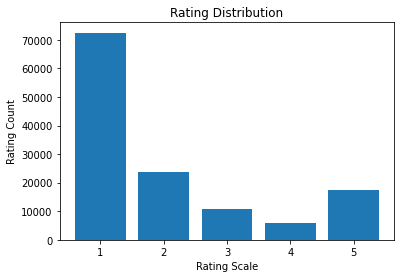

In [46]:
rating = df_final.play_count.value_counts()
plt.figure()
plt.bar(x = rating.index, height = rating)
plt.title('Rating Distribution')
plt.xlabel('Rating Scale')
plt.ylabel('Rating Count')
plt.show()


In [44]:
from google.colab import files
plt.savefig('Rating Distribution.jpeg')
files.download('Rating Distribution.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

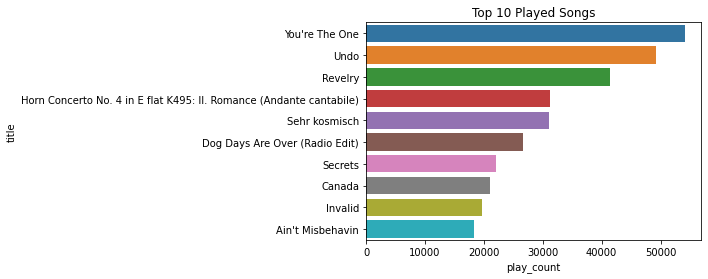

In [43]:
# sum of play_count by song_id
total_play_count = df_plot.groupby(by='song_id')['play_count'].sum().sort_values(ascending = False)
df_pc = pd.DataFrame(total_play_count, columns=['play_count']).reset_index()

# getting song_id and corresponding title
Song_Title = df_plot.groupby(by=['song_id', 'title']).sum()['play_count']
df_song_title = pd.DataFrame(Song_Title)
df_song_title = df_song_title.reset_index()
df_song_title.drop(columns='play_count', inplace=True)

# merging the 2 dataframes
title_play_count = df_song_title.merge(df_pc, how = 'left', on='song_id')
title_play_count.drop(columns = 'song_id', inplace=True)

#sort and pick top 10 songs
title_play_count = title_play_count.sort_values(by='play_count', ascending=False).iloc[:10]

# create plot
plt.figure()
sns.barplot(data = title_play_count, x = 'play_count', y = 'title')
# plt.bar(data = title_play_count.loc[:1], x = 'play_count', height= 'Song Name')
plt.title('Top 10 Played Songs')
plt.show()

#### **Observations and Insights:__________** # 

1. titles/albums released in recent years are more listened as compared to songs listened to old releses. 
    - This could mean that people are either liking the latest song releases more than the older albums/titles
    - Other interpretation could be that the spotify songs app is probably used by more younger generation and older generation is not using the app. This observation is based on the fact that younger generation tend to like latest songs.

2. Ratings are more skewed towards dislikes as number of dislikes are more than the number of likes on the songs. It means users are tough raters 

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different potential technqiues?<br>

#Potential Techniques

1. The play count is considered as rating by the users. More the play count more it is liked by the user

2. The rating scale is set to (1,5). This is done by dropping the interactions where play count is greater than 5.

3. Rating Normalization - Normalize rating to zero mean or Z score normalization to remove the rating effect of individual scale. 

4. Threshold rating for recommending a song has to be about 1.5 based on the rating distribution plot


#Solution Design

1. We will deal this as a regression problem (output rating 1-5) rather than a classification problem (like/dislike). This would help us to recommend songs in decreasing order of predicted rating

2. Following models can be developed based on the available data for recommending songs

    a. Collaborative Filtering models
        i) User-User similarity CF
        ii) item - item similarity CF

    b. Model Based approach 

    c. Content Based Filtering (using song information)

    d. Clustering based approach

# Measures of Success

1. RMSE Minimization - As the problem is handled as a regression problem this is the most apt measure for minimizing error

2. F1 Score - This measure is to be maximised as both Recall and Precision are important measure of success in song recommendation

    a. Recall - TP/(TP + FN) - %of of relevant recommendations made  
    b. Precision - TP/(TP + FP) - %age of recommendations that are relevant
